In [1]:
from keras import layers
from keras import models
# 创建一个卷积神经网络model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation= "sigmoid"))

C:\Users\Administrator\anaconda3\envs\DeepLearning-py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
from keras import optimizers
# 编译模型
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["acc"])

In [3]:
# 处理数据 包括缩放归一化
from keras.utils import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\train",
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)
valid_generator = valid_datagen.flow_from_directory(
    r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\validation",
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\test",
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


In [4]:
for data_batch,label_batch in train_generator:
    print("data batch shape:",data_batch.shape)
    print("label batch shape:",label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=1000,  # 20000张训练集 ÷ 20 = 1000
    epochs=30,
    validation_data=valid_generator,
    validation_steps=250   # 5000张验证集 ÷ 20 = 250
)

Epoch 1/30
   7/1000 [..............................] - ETA: 18s - loss: 0.3340 - acc: 0.8500

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\1818573799.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1000/1000 [==============================] - 24s 24ms/step - loss: 0.3600 - acc: 0.8407 - val_loss: 0.3817 - val_acc: 0.8302
Epoch 2/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.3162 - acc: 0.8627 - val_loss: 0.3581 - val_acc: 0.8454
Epoch 3/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2791 - acc: 0.8822 - val_loss: 0.3608 - val_acc: 0.8374
Epoch 4/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2470 - acc: 0.8980 - val_loss: 0.4059 - val_acc: 0.8332
Epoch 5/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2146 - acc: 0.9135 - val_loss: 0.3722 - val_acc: 0.8540
Epoch 6/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.1826 - acc: 0.9277 - val_loss: 0.3694 - val_acc: 0.8492
Epoch 7/30
1000/1000 [==============================] - 22s 22ms/step - loss: 0.1524 - acc: 0.9398 - val_loss: 0.4162 - val_acc: 0.8438
Epoch 8/30
1000/1000 [==============================] - 23s

In [9]:
# 保存模型
# 也可以这样写
model.save(filepath=r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\cats_and_dogs_small.h5")

In [10]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


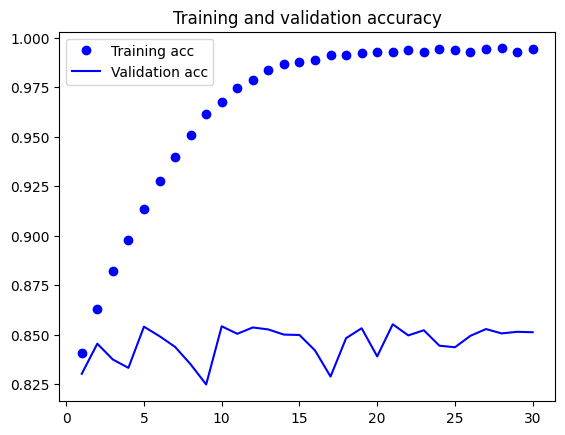

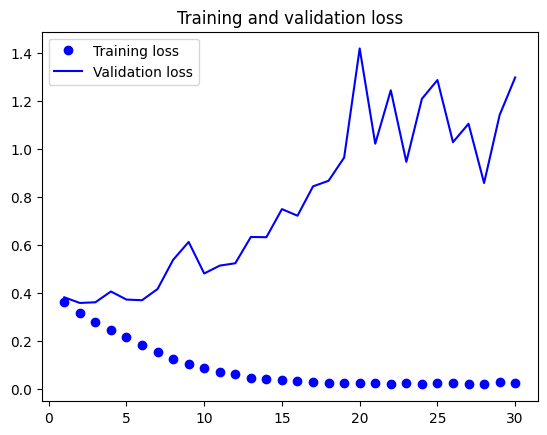

In [11]:
## 绘制训练过程中的损失函数和精度
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss= history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
# 利用ImageDataGenerator进行数据增强
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

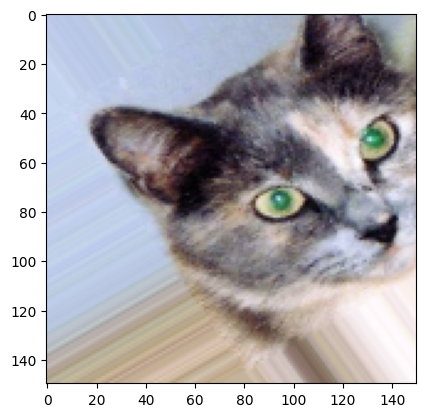

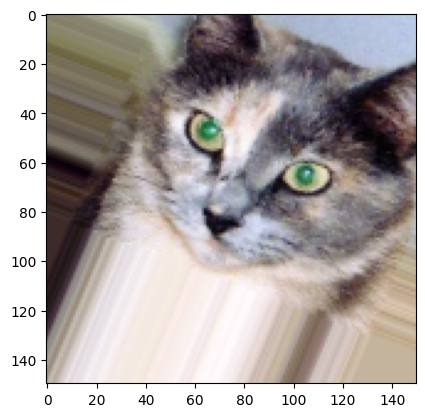

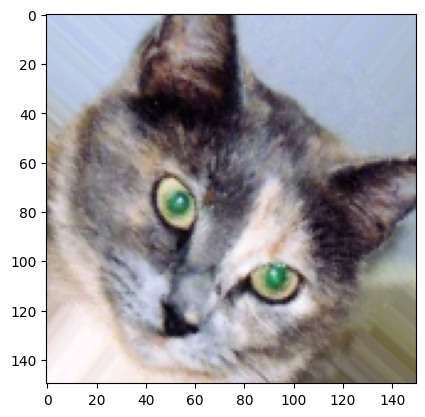

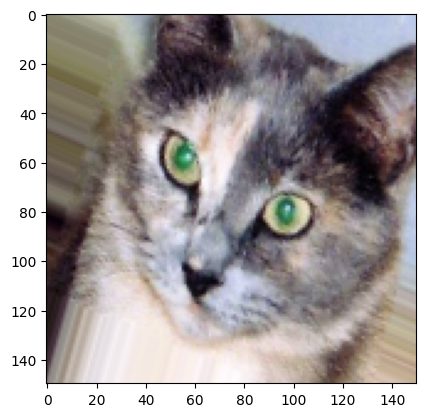

In [16]:
from keras.utils.image_utils import load_img, img_to_array
from keras.utils.image_utils import array_to_img
from keras.preprocessing import image
img_path = r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\train\cats\cat.1700.jpg"
img = load_img(img_path,target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i =0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [17]:
## 为了进一步降低过拟合 在卷积网络中添加Dropout层
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # 添加Dropout层
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation= "sigmoid"))

# 编译模型
model.compile(loss= "binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["acc"])

In [19]:
import tensorflow as tf
from tensorflow.keras.utils import ImageDataGenerator

# 创建一个简单的示例模型，这里只是举例，你需要替换为实际的model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# 创建一个测试数据生成器 归一化版
test_datagen = ImageDataGenerator(rescale=1./255)

# 注意验证数据不能增强 只能归一化 因为验证数据是用来评估模型泛化能力的 不能改变其内容 否则无法评估模型的泛化能力
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\train",
    target_size=(150,150),  # 将所有图像调整为150*150
    batch_size=32,
    class_mode="binary"  # 因为损失函数用的二元交叉熵，所以需要用二进制标签
)

valid_generator = test_datagen.flow_from_directory(
    r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\猫狗数据集\dataset\validation",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

# 设置steps_per_epoch以及validation_steps
steps_per_epoch = 20000 // 32
validation_steps = 5000 // 32

# 手动指定使用GPU
with tf.device('/device:GPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=30,
        validation_data=valid_generator,
        validation_steps=validation_steps
    )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/30


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\2968188472.py:57: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


625/625 [==============================] - 62s 99ms/step - loss: 0.6903 - accuracy: 0.5458 - val_loss: 0.6375 - val_accuracy: 0.6480
Epoch 2/30
625/625 [==============================] - 61s 98ms/step - loss: 0.6357 - accuracy: 0.6412 - val_loss: 0.6050 - val_accuracy: 0.6711
Epoch 3/30
625/625 [==============================] - 62s 98ms/step - loss: 0.6023 - accuracy: 0.6740 - val_loss: 0.5663 - val_accuracy: 0.7091
Epoch 4/30
625/625 [==============================] - 62s 98ms/step - loss: 0.5676 - accuracy: 0.7067 - val_loss: 0.5724 - val_accuracy: 0.7087
Epoch 5/30
625/625 [==============================] - 61s 98ms/step - loss: 0.5492 - accuracy: 0.7196 - val_loss: 0.5154 - val_accuracy: 0.7484
Epoch 6/30
625/625 [==============================] - 62s 99ms/step - loss: 0.5365 - accuracy: 0.7300 - val_loss: 0.4867 - val_accuracy: 0.7676
Epoch 7/30
625/625 [==============================] - 62s 98ms/step - loss: 0.5176 - accuracy: 0.7431 - val_loss: 0.4759 - val_accuracy: 0.7746
Epo

In [24]:
model.save(r"C:\Users\Administrator\PycharmProjects\深度学习日常练习项目\python深度学习红书\深度学习用于计算机视觉\猫狗分类模型\cats_and_dogs_small_2.h5")

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

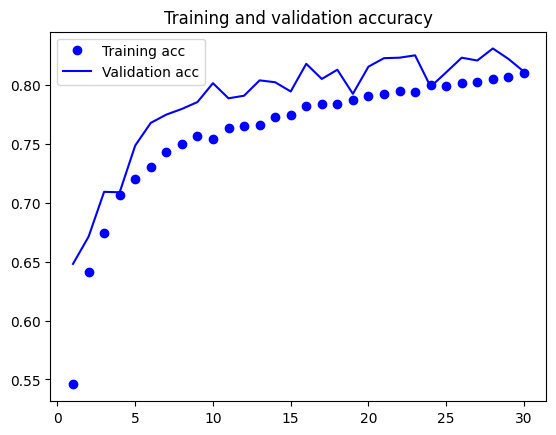

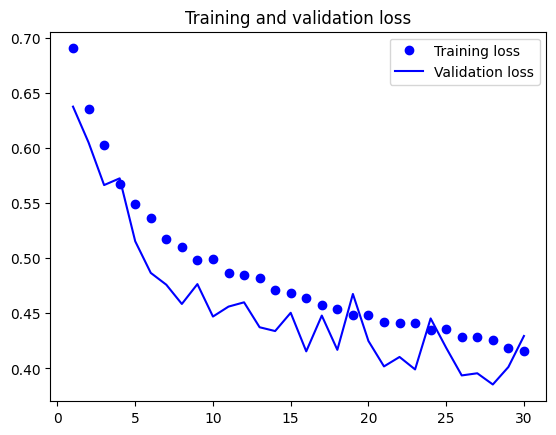

In [23]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss= history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()